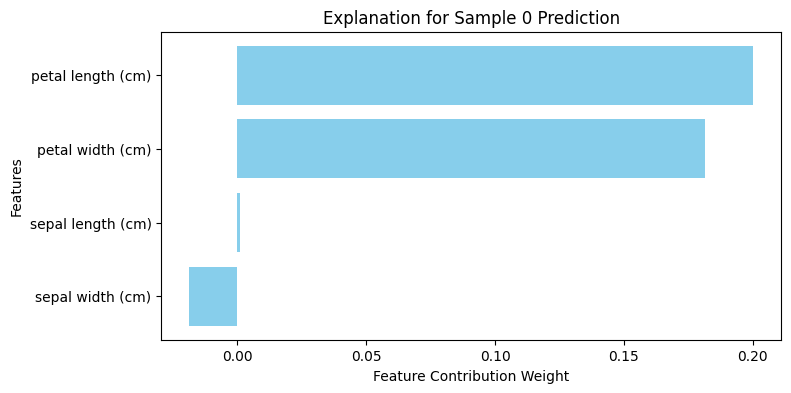

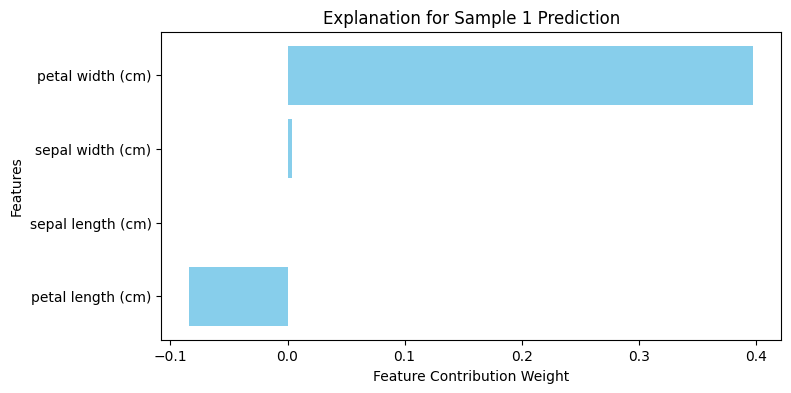

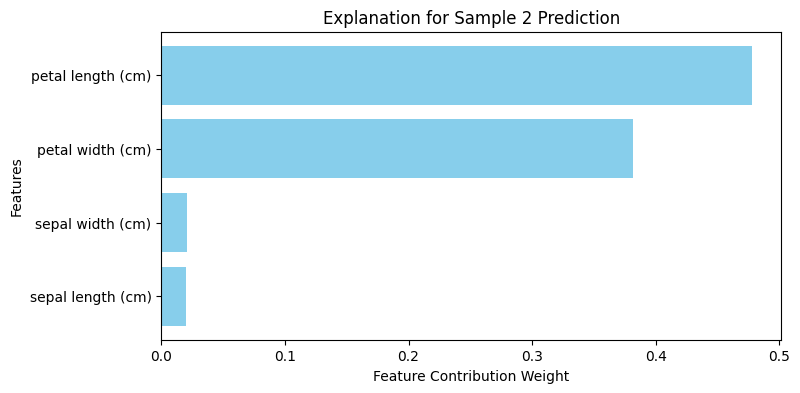

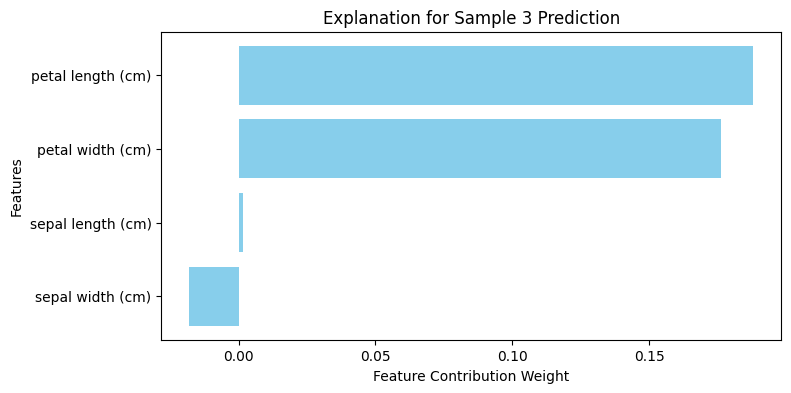

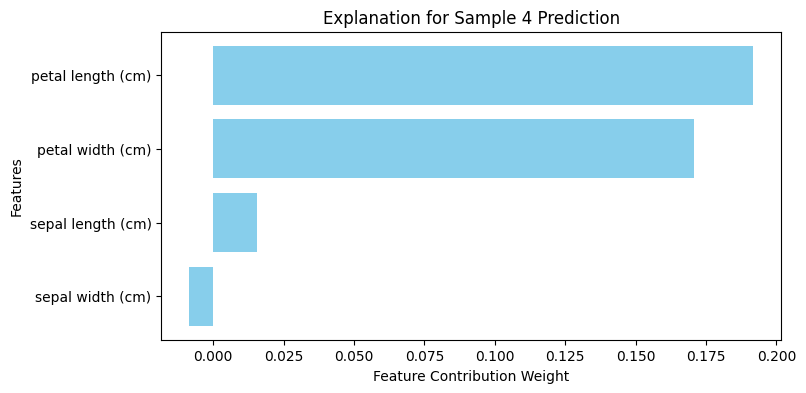

In [6]:
# Import necessary libraries
import lime
import lime.lime_tabular
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load a dataset (for example, Iris dataset)
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# Train a classifier (Random Forest in this case)
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=data.feature_names, class_names=data.target_names, discretize_continuous=True)

# Choose multiple samples to explain
sample_indices = [0, 1, 2, 3, 4]

# Generate LIME explanations for these samples and visualize using matplotlib
for idx, sample_index in enumerate(sample_indices):
    sample_instance = X_test[sample_index]
    # Explain the prediction using a linear model as a local surrogate
    exp = explainer.explain_instance(sample_instance, rf.predict_proba, num_features=4, top_labels=1)

    # Get the explanation for the top label
    exp_map = exp.as_map()
    label_to_explain = exp.available_labels()[0]
    feature_weights = exp_map[label_to_explain]

    # Sort by weights
    feature_weights.sort(key=lambda x: x[1])

    # Split feature names and weights
    features, weights = zip(*[(exp.domain_mapper.feature_names[i], weight) for i, weight in feature_weights])

    # Create a horizontal bar plot
    plt.figure(figsize=(8, 4))
    plt.barh(features, weights, color='skyblue')
    plt.title(f'Explanation for Sample {sample_index} Prediction')
    plt.xlabel('Feature Contribution Weight')
    plt.ylabel('Features')
    plt.show()
